## Offline activity : Module I

### Preparations

In [1]:
# import used libraries
import math
import numpy as np
import matplotlib.pyplot as plt

### Task 2 - Computing the conditional probability

In [2]:
# function that calculates the conditional probability of a person being COVID-positive given that they had a positive test
# result with the infection prevalence, specificity and sensitivity being independent variables
def condProb_pos_posTest(prev, spec, sens):
    prob = (sens * prev) / (prev * sens + (1-prev) * (1-spec))
    return(prob)

#### Task 1 - Calculating Fred's probability

In [3]:
# The probability that Fred is indeed infected is given by
condProb_pos_posTest(0.05, 0.99, 0.99)

0.8389830508474575

### Task 2 - Vizualizing the results

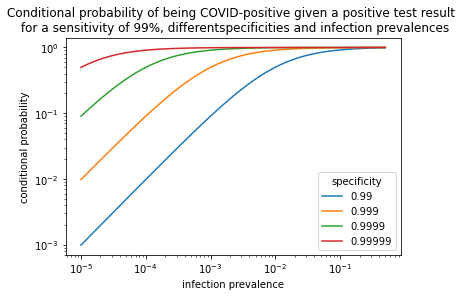

In [19]:
sens = 0.99
prev = np.geomspace(0.00001,0.5,50)
probs = []
    
for spec in [0.99, 0.999, 0.9999, 0.99999]:
    prob = condProb_pos_posTest(prev, spec, sens)
    probs.append(prob)
    plt.loglog(prev,prob)
plt.legend(['0.99', '0.999', '0.9999', '0.99999','reference'], title = 'specificity')
plt.xlabel('infection prevalence')
plt.ylabel('conditional probability')
plt.title('Conditional probability of being COVID-positive given a positive test result \n for a sensitivity of 99%, different'+
               'specificities and infection prevalences')
plt.show()

### Explaining the results using integers

Say, we look at a city with 10 million inhabitants. 
We assume that all tests that we review predict 99 positives when testing 100 actually infected patients. Meaning, we fix our sensitivity at 99%.

The probability that someone is a true positive, meaning they actually have COVID given that they had a positive test, is always given by the following ratio: (number of true positives) / (total number of people testing positive).

#### Example 1: Fred's case

Using our example from Task 1, we assume a specificity of 99% and infection prevalence of 5%.
The numbers we need to calculate can be given by the following diagram:

                                                            495'000 true positives
                            500'000 have COVID
                                                            5'000 false negatives
    10'000'000 inhabitants
                                                            95'000 false positives
                            9'500'000 don't have COVID
                                                            9'405'000 true negatives

Hence, our desired probability is given by the ratio:

In [66]:
495000 / (495000 + 95000)

0.8389830508474576

#### Example 2: Extreme case I

Let's now assume that 5'000'000 inhabitants have COVID, meaning that we have an infection prevalation of 50%. Since our sensitivitiy is still fixed at 99%, 4'950'000 infected inhabitants will test positive. Meaning, there are 4'950'000 true positives independent of the specificity of the test.

In order to understand our conditional probability for the different specificities 99%, 99.9%, 99.99% and 99.999%, we still need to know the number of false positives. Then we can directly deduce the number of positive test and calculate the conditional probability as the ratio (number of true positives) / (total number of positive tests). For the different specificities, the corresponding integer numbers are given by:

In [74]:
prev = 0.5
sens = 0.99
specs = [99.0, 99.9, 99.99, 99.999]
inhabitants = 10000000
true_pos = 4950000
for spec in specs:
    false_pos = round( (1-prev) *(1 - (spec/100))*inhabitants)
    pos_tests = false_pos + true_pos
    print('For a specificity of',spec, '%, there are', false_pos,' healthy inhabitants that test positive (false negatives).',
         'Hence, there are', pos_tests, 'positive test in total. Our conditional probability is thus', true_pos/pos_tests)

For a specificity of 99.0 %, there are 50000  healthy inhabitants that test positive (false negatives). Hence, there are 5000000 positive test in total. Our conditional probability is thus 0.99
For a specificity of 99.9 %, there are 5000  healthy inhabitants that test positive (false negatives). Hence, there are 4955000 positive test in total. Our conditional probability is thus 0.9989909182643795
For a specificity of 99.99 %, there are 500  healthy inhabitants that test positive (false negatives). Hence, there are 4950500 positive test in total. Our conditional probability is thus 0.9998990001009999
For a specificity of 99.999 %, there are 50  healthy inhabitants that test positive (false negatives). Hence, there are 4950050 positive test in total. Our conditional probability is thus 0.9999898990919284


In [68]:
# test, if results are correct
print(probs[0][-1],probs[1][-1], probs[2][-1], probs[3][-1])

0.99 0.9989909182643795 0.9998990001009999 0.9999898990919284


#### Example 3: Extreme case II

Let's repeat the calculations from Example 2 with a prevalence of 0.001%. That is, only 100 inhabitants are COVID-positive. Since again, the sensitivitiy is still fixed at 99%, 99 infected inhabitants will test positive, i.e. there are 99 true positives.

In [78]:
prev = 0.00001
true_pos = 99
for spec in specs:
    false_pos =  round((1-prev) *(1 - (spec/100))*inhabitants)
    pos_tests = false_pos + true_pos
    print('For a specificity of',spec, '%, there are', false_pos,' healthy inhabitants that test positive (false negatives).',
         'Hence, there are', pos_tests, 'positive test in total. Our conditional probability is thus', true_pos/pos_tests)

For a specificity of 99.0 %, there are 99999  healthy inhabitants that test positive (false negatives). Hence, there are 100098 positive test in total. Our conditional probability is thus 0.0009890307498651321
For a specificity of 99.9 %, there are 10000  healthy inhabitants that test positive (false negatives). Hence, there are 10099 positive test in total. Our conditional probability is thus 0.009802950787206654
For a specificity of 99.99 %, there are 1000  healthy inhabitants that test positive (false negatives). Hence, there are 1099 positive test in total. Our conditional probability is thus 0.09008189262966333
For a specificity of 99.999 %, there are 100  healthy inhabitants that test positive (false negatives). Hence, there are 199 positive test in total. Our conditional probability is thus 0.49748743718592964


In [ ]:
# test, if results are correct
print(probs[0][0],probs[1][0], probs[2][0], probs[3][0])

What about a test with a specificity of 99.9999%?

In [90]:
print(condProb_pos_posTest(0.00001, 0.999999, 0.99))

0.9082577139955067


#### Example 4: More realistic case

As a last exapmle, assume that 1'000'000 inhabitants are infected with COVID, i.e. the infection prevalence is 10%. The number of true positives is then 990'000.

In [80]:
prev = 0.1
true_pos = 990000
for spec in specs:
    false_pos =  round((1-prev) *(1 - (spec/100))*inhabitants)
    pos_tests = false_pos + true_pos
    print('For a specificity of',spec, '%, there are', false_pos,' healthy inhabitants that test positive (false negatives).',
         'Hence, there are', pos_tests, 'positive test in total. Our conditional probability is thus', true_pos/pos_tests)

For a specificity of 99.0 %, there are 90000  healthy inhabitants that test positive (false negatives). Hence, there are 1080000 positive test in total. Our conditional probability is thus 0.9166666666666666
For a specificity of 99.9 %, there are 9000  healthy inhabitants that test positive (false negatives). Hence, there are 999000 positive test in total. Our conditional probability is thus 0.990990990990991
For a specificity of 99.99 %, there are 900  healthy inhabitants that test positive (false negatives). Hence, there are 990900 positive test in total. Our conditional probability is thus 0.9990917347865577
For a specificity of 99.999 %, there are 90  healthy inhabitants that test positive (false negatives). Hence, there are 990090 positive test in total. Our conditional probability is thus 0.9999090991728025


In [82]:
# test, if results are correct
for spec in specs:
    print(condProb_pos_posTest(prev, spec/100, sens))

0.9166666666666666
0.990990990990992
0.9990917347865568
0.9999090991728018


### Task 3 - Interpreting the results

Using the figure from above and the integer numbers from the previous examples, we can now interpret the results.

For a fixed sensitivity, the conditional probability P of someone being COVID-positive given that they had a positive test result depends on the specificity and infection prevalence (>> see figure): <br>
The higher the specificity, the higher P. <br>
The higher the infection prevalence, the higher P. The correlation is not linear but a bounded growth: The smaller the prevalence, the higher is the effect that a change in prevalence has on P.

While all specificities can guarantee a convincing probability of more than 99% for an infection prevalence of 50% (>> see Example 2), they vary significantly for a miniscule prevalence of 0.001% (>> see Example 3): The highest sensitivity of 99.999% can still guarantee to predict every second person correctly. This is certainly a terrible reliability for a test, but still considerably better than the correctness for the other sensitivities (ca 9%, 1% and 0.1%).
 
If the infection prevalence is “high enough” – roughly speaking higher than 10% (>> see Example 4)-, the prediction reliability of all test with a sensitivity of 99% or higher is “acceptable”, namely larger than 90%. But as least a specificity of 99.9% or higher is needed to have “very good” test results, i.e. a conditional probability of more than 99%.


In contrast, if the infection prevalence is very small, e.g. 0.001% (>> see Example 3), meaning almost no one is infected, then there is no test than can guarantee a reliable result. In theory, to achieve “acceptable” results, a test with specificity higher than 99.9999% would suffice, i.e. 999’999 positive test results when testing 1 million COVID-positive people. In practice, however, even if the test is in theory “perfect”, other factors (such as wrong application, contamination or prior damage of tests etc.) will pretty much guarantee at least a handful of tests that are false positives when testing 1 million people. Thus, resulting in an insufficiently large specificity and a useless reliability of a test with a sensitivity of 99%.
